In [1]:
#!pip install lightgbm==3.3.2

In [ ]:
#!pip install xgboost==1.5.0

In [ ]:
#!pip install hyperopt

In [ ]:
# 필요 모듈 로딩, 학습 데이터 dataframe 로딩

# mission : 데이터셋의 shape를 확인하고, 데이터셋을 3행만 출력해주세요.

In [1]:
# mission : 전처리를 위해 데이터셋을 살펴보세요 
''' hint : 피쳐의 타입과 null 값을 확인하는 함수와 
    피처들의 수학적 통계값을 확인하는 함수를 활용하세요 '''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings


df = pd.read_csv(r"C:\Users\82105\Desktop\train_santander.csv")
print('dataset shape:', df.shape)
df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
# Target 속성의 값 분포 확인하기
# mission :  전체 데이터 셋에서 만족, 불만족 각각의 개수와 비율을 파악해봅시다
df.info()

''' hint : 다음 두 함수를 활용해요 ! 
    - value_counts(): 고유 값의 빈도를 구함.
    - count(): 결측치가 아닌 값의 총 개수를 구함. '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


' hint : 다음 두 함수를 활용해요 ! \n    - value_counts(): 고유 값의 빈도를 구함.\n    - count(): 결측치가 아닌 값의 총 개수를 구함. '

In [11]:
print(df['TARGET'].value_counts())
unsatisfied = df[df['TARGET'] == 1].TARGET.count()
satisfied = df[df['TARGET'] == 0].TARGET.count()
total = df.TARGET.count()
print('unsatified 비율은 {0:.2f}'.format((unsatisfied / total)))

''' hint : 다음 두 함수를 활용해요 ! 
    - value_counts(): 고유 값의 빈도를 구함.
    - count(): 결측치가 아닌 값의 총 개수를 구함. '''

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatified 비율은 0.04


' hint : 다음 두 함수를 활용해요 ! \n    - value_counts(): 고유 값의 빈도를 구함.\n    - count(): 결측치가 아닌 값의 총 개수를 구함. '

# 전처리
##### 어떤 전처리를 해야할까요 ?  위의 데이터 살펴보기 과정에서 어떤 문제점을 발견했나요?

In [3]:
### sweetviz 사용해보기 !

''' import sweetviz as sv
import pandas as pd

# 데이터셋 로드 (예: pandas DataFrame)
df = ____

# Sweetviz 보고서 생성
report = sv.analyze(df, pairwise_analysis='off')
# 보고서 HTML 파일로 저장
report.show_html('sweetviz_report.html') '''

In [9]:
# 피처 세트와 레이블 세트 분리
df['var3'] = df['var3'].replace(-999999, 2)
df.drop('ID', axis=1, inplace = True)
X_features = df.iloc[:, :-1]
y_labels = df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

### hint : X_features와 y_labels를 분리해주세요 ~

피처 데이터 shape:(76020, 369)


In [17]:
# 학습/테스트 데이터 세트 분리

### hint :  sklearn 패키지를 이용해요 :)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)


In [15]:
# mission : 
# 학습 세트 레이블 값 분포 비율 , 테스트 세트 레이블 값 분포 비율을 출력해볼까요?

### hint : 아까 사용했던 value_counts, count 함수를 활용해보아요 ~

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습세트 Shape: {0}, 테스트 세트 Shape{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/ test_cnt)


학습세트 Shape: (60816, 369), 테스트 세트 Shape(15204, 369)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


## 본격 모델링을 시작합니다. 
### 배운 내용을 떠올리며, 빈칸을 채워보아요 :)

# XGBoost

In [23]:
# XGBoost 조기 중단의 검증 데이터 세트 위해 X_train, y_train 다시 학습/검증 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB 7.6 MB/s eta 0:00:17
   ---------------------------------------- 0.5/124.9 MB 5.6 MB/s eta 0:00:23
   ---------------------------------------- 0.7/124.9 MB 6.2 MB/s eta 0:00:20
   ---------------------------------------- 0.9/124.9 MB 5.8 MB/s eta 0:00:22
   ---------------------------------------- 1.1/124.9 MB 6.0 MB/s eta 0:00:21
   ---------------------------------------- 1.3/124.9 MB 6.1 MB/s eta 0:00:21
    --------------------------------------- 1.6/124.9 MB 5.9 MB/s eta 0:00:21
    --------------------------------------- 1.8/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 2.0/124.9 MB 6.1 MB/s eta 0:00:21
    --------------------------------------- 2.3/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 2.4/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 2.7/124.9 MB 5.9 MB/s eta 0

In [ ]:
pip uninstall xgboost


In [77]:
pip install xgboost==1.3.3 


   ---------------------------------------- 0.0/95.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/95.2 MB 7.4 MB/s eta 0:00:13
   ---------------------------------------- 0.5/95.2 MB 7.3 MB/s eta 0:00:13
   ---------------------------------------- 0.7/95.2 MB 6.4 MB/s eta 0:00:15
   ---------------------------------------- 0.9/95.2 MB 6.4 MB/s eta 0:00:15
   ---------------------------------------- 1.1/95.2 MB 6.6 MB/s eta 0:00:15
    --------------------------------------- 1.4/95.2 MB 6.2 MB/s eta 0:00:16
    --------------------------------------- 1.6/95.2 MB 6.3 MB/s eta 0:00:15
    --------------------------------------- 1.8/95.2 MB 6.5 MB/s eta 0:00:15
    --------------------------------------- 2.1/95.2 MB 6.2 MB/s eta 0:00:15
    --------------------------------------- 2.3/95.2 MB 6.3 MB/s eta 0:00:15
   - -------------------------------------- 2.5/95.2 MB 6.1 MB/s eta 0:00:16
   - -------------------------------------- 2.7/95.2 MB 6.2 MB/s eta 0:00:15
   - -

  You can safely remove it manually.


In [81]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# XGBClassifier 설정
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# eval_set과 조기 중단 파라미터 설정
evals = [(X_tr, y_tr), (X_val, y_val)]

# 모델 학습
xgb_clf.fit(X_tr, y_tr, eval_set=evals, eval_metric="auc", early_stopping_rounds=100, verbose=True)

# ROC AUC 점수 계산
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'eval_metric'

In [85]:
import xgboost as xgb
print(xgb.__version__)


2.1.1


In [37]:
!pip install hyperopt
# HyperOpt로 하이퍼 파라미터 튜닝
from hyperopt import hp

# 입력값, 검색 공간 설정
# max_depth는 5에서 15까지 1간격, min_child_weight는 1에서 6까지 1간격
# colsample_bytree는 0.5에서 0.95 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색
xgb_search_space = {'max_depth': hp.quniform('max_depth',5,15,1),
                   'min_child_weight': hp.quniform('min_child_weight',1,6,1),
                   'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                   'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),}


### mission : quniform, uniform 함수는 뭘까요 ?
'''uniform: 주어진 범위 내에서 연속적인 균등 분포의 난수를 생성합니다.
quniform: 주어진 범위 내에서 이산적인 균등 분포의 난수를 생성하는 함수입니다. 일반적으로 Bayesian Optimization이나 하이퍼파라미터 조정에 사용됩니다.'''

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 320.0 kB/s eta 0:00:05
   - -------------------------------------- 0.0/1.6 MB 487.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.6 MB 1.2 MB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.6 MB 2.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.6 MB 3.1 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.6 MB 3.7 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.6 MB 3.8 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.6 MB 4.1 MB/s eta 0:00:01
   ------------------------------------- -- 1.5/1.6 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 4.2 MB/s eta 0:00:00
   --------------------------

'uniform: 주어진 범위 내에서 연속적인 균등 분포의 난수를 생성합니다.\nquniform: 주어진 범위 내에서 이산적인 균등 분포의 난수를 생성하는 함수입니다. 일반적으로 Bayesian Optimization이나 하이퍼파라미터 조정에 사용됩니다.'

In [41]:
# 목적 함수, 3 Fold 교차 검증 이용
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1*roc_acu 평균 값 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                                                           min_child_weight=int(search_space['min_child_weight']),
                                                           colsample_bytree=search_space['colsample_bytree'],
                                                           learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = [ ]
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=__, eval_metric="auc",
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 저장
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc 값의 평균값 반환하되,
    # HyperOpt는 목적함수의 최솟값 위한 입력값 찾으므로 -1 곱
    return -1 * np.mean(roc_auc_list)

In [43]:
# fmin() 함수 호출, 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수 호출 max_evals 지정된 횟수만큰 반복 후 목적함수의 최솟값 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=50, # 최대 반복 횟수 지정
           trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

job exception: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'



  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
# n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                       max_depth=int(best['max_depth']),
                       min_child_weight=int(best['min_child_weight']),
                       colsample_bytree=round(best['colsample_bytree'], 5))

# evaluation metric을 auc로, early stopping 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
           eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

NotFittedError: need to call fit or load_model beforehand

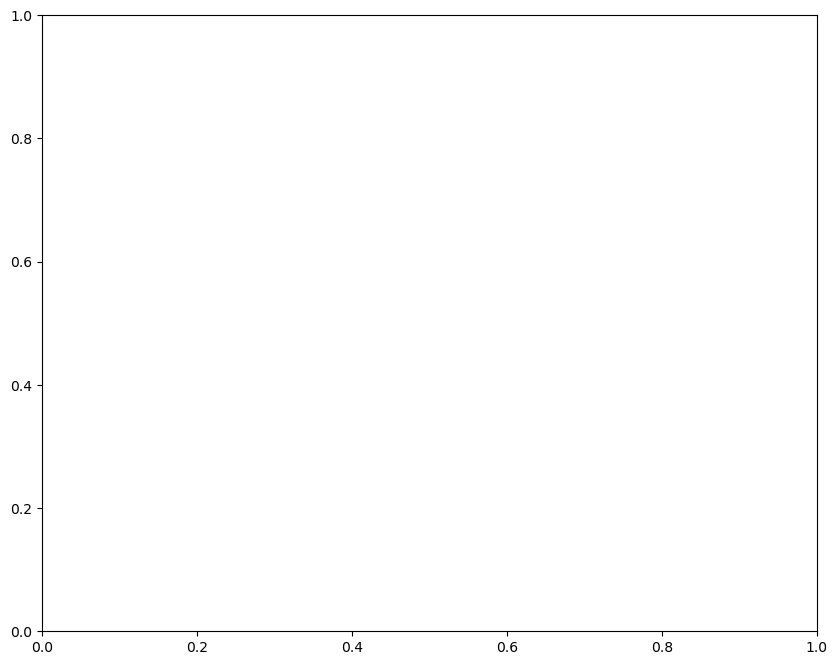

In [45]:
# 피처 중요도 그래프
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

# LightGBM

In [47]:
# LightGBM으로 학습 수행
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
# HyperOpt로 하이퍼 파라미터 튜닝
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                   'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                   'subsample': hp.uniform('subsample', 0.7, 1),
                   'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)}

In [ ]:
# 목적 함수 생성
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                                                           max_depth=int(search_space['max_depth']),
                                                           min_child_samples=int(search_space['min_child_samples']),
                                                           subsample=search_space['subsample'],
                                                           learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = [ ]
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 LGBMClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 저장
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc 값의 평균값 반환하되,
    # HyperOpt는 목적함수의 최솟값 위한 입력값 찾으므로 -1 곱
    return -1 * np.mean(roc_auc_list)

In [ ]:
# fmin() 함수 호출, 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수 호출 max_evals 지정된 횟수만큰 반복 후 목적함수의 최솟값 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
           space=lgbm_search_space,
           algo=tpe.suggest,
           max_evals=50, # 최대 반복 횟수 지정
           trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

In [ ]:
# 최적 하이퍼 파라미터로 LightGBM 학습, ROC-AUC 평가
lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                                            max_depth=int(best['max_depth']),
                                            min_child_samples=int(best['min_child_samples']),
                                            subsample=round(best['subsample'], 5),
                                            learning_rate=round(best['learning_rate'], 5))

# evaluation metric을 auc로, early stopping 100으로 설정하고 학습 수행
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
           eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))